In [ ]:
#load dataset using pandas,needed formating  
#a.check and remove the null values  b. plot the need features
#ARIMA- Autoregrresive integrated moving average
#Autoregressive- Lag of Stationarized Series
#Stationarity is nothing but when mean and variance is constant 
# Not Stationary- Find difference  OR Correction of Lag ----> To make stationary==Integrated
#Moving Average:  Lag of the forcasting errors
#Build a function to set if data is stationary or not
#load the required package used for implementing Arima- pmdarima
#5.Train model, split data, fit the model on top up algorithm.c. perform time series forcasting with the help of test data
#d. plot the prediction along with actual values
#6. Check the RMSE to compare the efficiency
# perform time series forcasting and try to forcast average tempratures for next 30 days.

In [1]:
!pip install pmdarima
#help us to get the (p,d,q) parameters
#white noise, variance, ACF

     |████████████████████████████████| 1.4 MB 4.9 MB/s 
     |████████████████████████████████| 9.8 MB 34.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# p, d , q parameters help us to get the best fitted arima model
#p---> autoregressive terms--lag in stationarity
#d--->integrated ::correcting the lag = difference needed for stationarity
#q---> moving average--> lag in forcast error

In [2]:
import pandas as pd
import numpy as np

In [13]:
df=pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE', parse_dates=True)
#parse_dates makes date column as important column
#remove null values
df=df.dropna()


In [14]:
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [15]:
print("shape=",df.shape)
df.head()

shape= (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


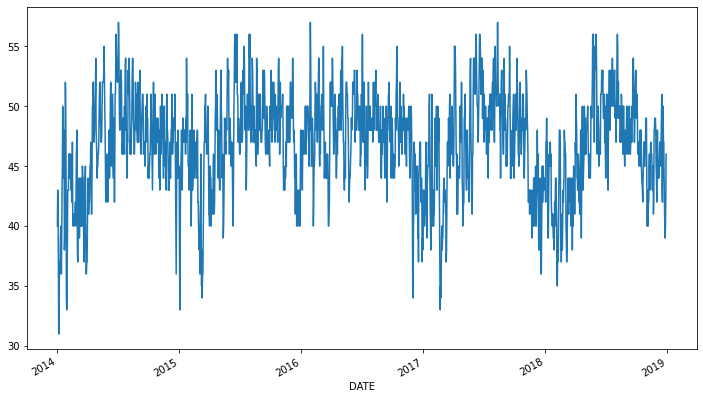

In [19]:
#plot the needed features/frequencies
df['AvgTemp'].plot(figsize=(12,7))

#df['AvgTemp'].plot(figsize=(12,7))

In [18]:
#df['AvgTemp'].plot(figsize=(50,40))

In [20]:
#stationary-> mean and variance must be constant
#Q2 Build a function to check whether the given data is stationary or not?

In [22]:
from statsmodels.tsa.stattools import adfuller

In [28]:
#To see if perticular data is stationary or not
#p-value<0.05-> stationary  , if p-val>0.05-> bad model  
#8.67^-9
def adf_test(dataset):
  dftest=adfuller(dataset,autolag='AIC')
  print("1. ADF:",dftest[0])
  print("2. p-value",dftest[1])
  print("3. number of lags",dftest[2])
  print("4.number of observations used for ADF Regression and critical value calculation",dftest[3])
  print("5.Critical Values")

  for key,val in dftest[4].items():
    print("\t",key,":",val)

In [29]:
adf_test(df['AvgTemp'])

1. ADF: -6.554680125068777
2. p-value 8.675937480199653e-09
3. number of lags 12
4.number of observations used for ADF Regression and critical value calculation 1808
5.Critical Values
	 1% : -3.433972018026501
	 5% : -2.8631399192826676
	 10% : -2.5676217442756872


In [31]:
#load the required package used for implementing Arima- pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [32]:
#Q.4.Identify the best suited model
#p, d , q will help us to get the best fitted arima model


In [36]:
stepwise_fit = auto_arima(df['AvgTemp'],trace=True,suppress_warnings=True)
#to determine the best combination of parameters p, d, q
stepwise_fit.summary()
#stepwise just a name
#AIC=low-> good model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.973, Time=3.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.62 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.52 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.286, Time=3.75 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.061, Time=3.67 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=3.42 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.274, Time=4.26 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.188, Time=4.64 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.476, Time=5.13 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.681, Time=4.87 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.480
Date:                Sun, 31 Oct 2021   AIC                           8294.960
Time:                        16:35:10   BIC                           8339.017
Sample:                             0   HQIC                          8311.213
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2633      0.374      3.377      0.001       0.530       1.996
ar.L1          0.9729      0.008    120.958      0.000       0.957       0.989
ma.L1         -0.1266      0.024     -5.344      0.000      -0.173      -0.080
ma.L2         -0.2167      0.024     -8.987      0.000      -0.264      -0.169
ma.L3         -0.2038      0.024     -8.546      0.000      -0.251      -0.157
ma.L4         -0.1400      0.023     -6.164      0.000      -0.184      -0.095
ma.L5         -0.0471      0.024     -1.937      0.053      -0.095       0.001
sigma2         5.4837      0.171     32.032      0.000       5.148       5.819
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.67
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# p, d , q parameters help us to get the best fitted arima model
#p---> autoregressive terms--lag in stationarity
#d--->integrated ::correcting the lag = difference needed for stationarity
#q---> moving average--> lag in forcast error
# p=1=AR  d=0=I q=5=MA,
# p=lag in stationarized data
#5.a.Train model, b.split data, fit the model on top up algorithm.
#c. perform time series forcasting with the help of test data
#d. plot the prediction along with actual values
#AR-will glance the entire data and give result------AR---1-times
#I-find result by integrating the data--------------I-----0-times
#MA- Find the average of data and then it integrates the data
#MA->Average+Integrate------->MA process is carried out 5 times

In [50]:
from statsmodels.tsa.arima.model import ARIMA  #in colab
#from statsmodels.tsa.arima_model import ARIMA---> in Jupyter

In [51]:
print(df.shape)

(1821, 5)


In [52]:
train=df.iloc[:-30]

In [53]:
test=df.iloc[-30:]

In [54]:
print(train.shape,test.shape)

(1791, 5) (30, 5)


In [55]:
print(test.iloc[0],test.iloc[-1])

MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


In [48]:
#train the model


In [56]:
model=ARIMA(train['AvgTemp'],order=(1,0,5)) #because this was our best fitted model
model=model.fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Sun, 31 Oct 2021   AIC                           8156.395
Time:                        17:02:09   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
#make predictions on set
start=len(train)

In [59]:
end=len(train)+len(test)-1

In [63]:
index_future_dates=pd.dates_range(start='2018-12-01',end='2018-12-30')


AttributeError: ignored

In [66]:
#pred=model.predict(start=start,end=end).rename('Arima Predictions')
#pred.index=index_future_dates
#pred.plot(legend=True)
#test['AvgTemp'].plot(legend=True)

pred=model.predict(start=start,end=end).rename('Arima Predictions')
pred.index=index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)





NameError: ignored

In [67]:
test['AvgTemp'].mean()

45.0

In [68]:
#6. Check the RMSE to compare the efficiency
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred_test['AvgTemp']))
#rmse 3.0004976423656977


NameError: ignored

In [69]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


2018-12-01    46.418166
2018-12-02    46.113912
2018-12-03    45.617874
2018-12-04    45.249566
2018-12-05    45.116916
2018-12-06    45.136666
2018-12-07    45.156140
2018-12-08    45.175342
2018-12-09    45.194275
2018-12-10    45.212943
2018-12-11    45.231350
2018-12-12    45.249499
2018-12-13    45.267394
2018-12-14    45.285039
2018-12-15    45.302437
2018-12-16    45.319592
2018-12-17    45.336506
2018-12-18    45.353184
2018-12-19    45.369629
2018-12-20    45.385843
2018-12-21    45.401831
2018-12-22    45.417594
2018-12-23    45.433138
2018-12-24    45.448463
2018-12-25    45.463575
2018-12-26    45.478475
2018-12-27    45.493166
2018-12-28    45.507652
2018-12-29    45.521935
2018-12-30    45.536019
2018-12-31    45.549905
Freq: D, Name: ArimaPrediction, dtype: float64


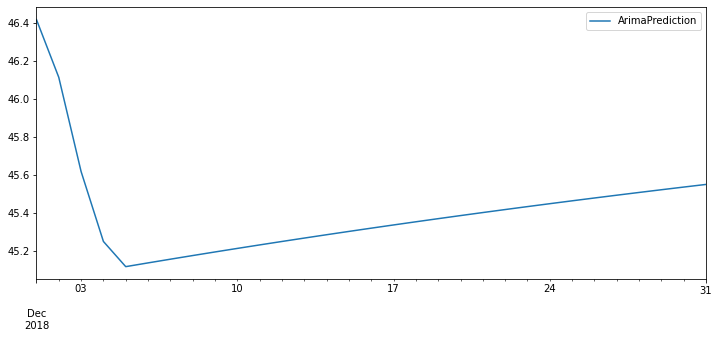

In [74]:
# 7.perform time series forcasting and try to forcast average tempratures for next 30 days.

index_future_dates=pd.date_range(start='2018-12-01', end='2018-12-31')
pred=model2.predict(start=len(df),end=len(df)+30).rename('ArimaPrediction')
pred.index=index_future_dates
print(pred)
xcv   pred.plot(figsize=(12,5),legend=True)